# 바이러스

### - 문제설명

신종 바이러스인 웜 바이러스는 네트워크를 통해 전파된다. 한 컴퓨터가 웜 바이러스에 걸리면 그 컴퓨터와 네트워크 상에서 연결되어 있는 모든 컴퓨터는 웜 바이러스에 걸리게 된다.

예를 들어 7대의 컴퓨터가 <그림 1>과 같이 네트워크 상에서 연결되어 있다고 하자. 1번 컴퓨터가 웜 바이러스에 걸리면 웜 바이러스는 2번과 5번 컴퓨터를 거쳐 3번과 6번 컴퓨터까지 전파되어 2, 3, 5, 6 네 대의 컴퓨터는 웜 바이러스에 걸리게 된다. 하지만 4번과 7번 컴퓨터는 1번 컴퓨터와 네트워크상에서 연결되어 있지 않기 때문에 영향을 받지 않는다.

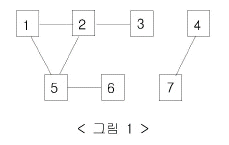

어느 날 1번 컴퓨터가 웜 바이러스에 걸렸다. 컴퓨터의 수와 네트워크 상에서 서로 연결되어 있는 정보가 주어질 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 출력하는 프로그램을 작성하시오.


### - 입력

첫째 줄에는 컴퓨터의 수가 주어진다. 컴퓨터의 수는 100 이하이고 각 컴퓨터에는 1번 부터 차례대로 번호가 매겨진다. 둘째 줄에는 네트워크 상에서 직접 연결되어 있는 컴퓨터 쌍의 수가 주어진다. 이어서 그 수만큼 한 줄에 한 쌍씩 네트워크 상에서 직접 연결되어 있는 컴퓨터의 번호 쌍이 주어진다.

### - 출력

1번 컴퓨터가 웜 바이러스에 걸렸을 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 첫째 줄에 출력한다.

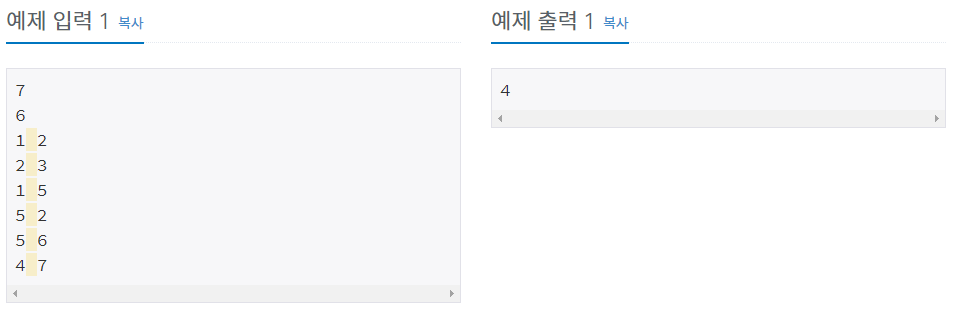

### 풀이 - BFS

그림을 보자마자 BFS로 풀어야겠다는 생각이 들었다.

        1  -  2  -  3           4
         |   |                  |
           5   -  6             5

인데 1번에 바이러스가 있으므로 1번을 start 지점으로 해서 BFS를 시작하여 연결된 1번과 연결된 것만 빼내면 된다.

1 -> (2, 5) -> (3, 6) 순으로 탐색하게 될 것이다.

그렇게 되면 4, 7번은 탐색하지 않게되고 이 컴퓨터는 감염되지 않은 것이다.

그래서 visited에 1 2 5 3 6을 담고 1번은 원래 바이러스였으므로 visited의 길이에서 1을 빼주면 된다.


In [ ]:
n = int(input())
m = int(input())
graph = [[] for _ in range(n+1)]
for _ in range(m):
    x, y = map(int, input().split())
    graph[x].append(y)
    graph[y].append(x)

visited = [1]

def bfs(x):
    global answer
    queue = [x]
    while queue:
        y = queue.pop(0)
        for i in graph[y]:
            if i not in visited:
                visited.append(i)
                queue.append(i)
bfs(1)
print(len(visited)-1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


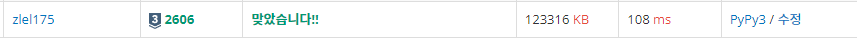

### 풀이 - DFS

DFS도 결국 1번부터 시작해서 탐색하는 것은 같다.

하지만 탐색 순서는 조금 다르다. 1 - 2 - 3 - 5 - 6 순으로 탐색하게 될 것이고,
4 7은 탐색하지 않아 visited에 들어가지 않을 것이고, 이것으로 답을 출력하면 된다.

In [ ]:
n = int(input())
m = int(input())
graph = [[] for _ in range(n+1)]
for _ in range(m):
    x, y = map(int, input().split())
    graph[x].append(y)
    graph[y].append(x)

visited = []

def dfs(start):
    visited.append(start)
    for i in graph[start]:
        if i not in visited:
            dfs(i)

dfs(1)
print(len(visited) - 1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


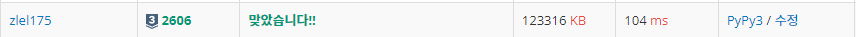